# Reinforcement learning

## An interactive notebook training Keras to play Catch

This is an interactive version of [Eder Santana's](http://edersantana.github.io/) [Keras plays catch, a single file Reinforcement Learning example](https://edersantana.github.io/articles/keras_rl/). The first interactive version of the original code was written by [cadurosar](https://gist.github.com/cadurosar/bd54c723c1d6335a43c8). I added comments and explanations, following the explanation laid out in [Demystifying Deep Reinforcement Learning](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/) by [Tambet Matiisen](https://github.com/tambetm/). Please visit all the aforementioned authors websites for more information and give them credit for doing all the heavy lifting. This code is realeased under an MIT license, but please be aware that Google has the patent for Q-Learning.


## The task

Catch is a very simple arcade game, which you might have played as a child. Fruits are falling from the top of the screen and the player has to catch them with a basket. For every fruit caught, the player gets a point. For every fruit lost, the player looses a point. Our goal here is to let the computer play Catch by itself.

When playing Catch, the player has to decide between 3 possible actions. The player can move the basket to the left, to the right, or stay put. The basis for this decision is the current state of the game, the position of the fruit and the position of the basket, which are both visible on the screen. Our goal is therefore to create a model, which, given the content of the game screen, chooses the action which leads to the highest score possible.

This task could be framed as a simple classification problem. We could collect training data by letting expert human players play lots of games and then train a model on choosing the 'correct' action that mirrors the expert players. This is not how humans learn however. Humans can learn a game like catch by themselves, without guidiance. This is very useful. Imagine you would have to hire a bunch of experts to perform a task thousands of times everytime you wanted to learn something as simple as Catch. It would be very expensive and very slow. Here, we are going to demonstrate a technique called reinforcement learning, where the model learns from experience, rather than labeled training data.

# Setting up the game

This is the code for the actual game we are training on.
Catch is a simple game you might have played as a child. In the game, fruits, represented by white tiles, fall from the top. The goal is to catch the fruits with a basked (represented by white tiles, this is deep learning, not game design). If you catch a fruit, you get a point (your score goes up by one), if you miss a fruit, you loose one (your score goes down).

Don't worry all too much about the details of the implementation, the focus here should be on the AI, not on the game.
Just make sure you run this cell so that it is defined.

In addition to defining the game we need to define some helper variables and functions.
Run the cells below to define them, then we will get to the meat and the potatoes of this notebook.

# Deep reinforcement learning

After the game is all setup, let's get to the exciting part.

For a deeper understanding of what is going on in the next couple of cells, definetly check out [Demystifying Deep Reinforcement Learning](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/) and the links posted at the end of Tambet's post.

## Q-learning intuition.

A good way to understand Q-learning is to compare playing Catch with playing chess. In both games you are given a state s (chess: positions of the figures on the board, Catch: location of the fruit and the basket), on which you have to take an action a (chess: move a figure, Catch: move the basket to the left, right, or stay where you are). As a result there will be some reward r and a new state s’. The problem with both Catch and and chess is that the rewards will not appear immediately after you have taken the action. In Catch, you only earn rewards when the fruits hit the basket or fall on the floor, and in chess you only earn a reward when you win or loose the game. Rewards are _sparsely distributed_, most of the time, r will be 0. When there is a reward, it is not always a result of the action taken immediately before. Some action taken long before might have cause the victory. Figuring out which action is responsible for the reward is often referred to as the _credit assignment problem_.

Because rewards are delayed, good chess players do not choose their plays only by the immediate reward, but by the _expected future reward_. They do not only think about whether they can eliminate an opponents figure in the next move, but how taking a certain action now will help them in the long run. 
In Q-learning, we choose our action based on the highest expected future reward. While in state s, we estimate the future reward for each possible action a. We assume that after we have taken action a and moved to the next state s’, everything works out perfectly. Like in finance, we discount future rewards, since they are uncertain.
The expected future reward Q(s,a) given a state s and an action a is therefore the reward r that directly follows from a plus the expected future reward Q(s’,a’) if the optimal action a’ is taken in the following state s’, discounted by the discount factor gamma.

Q(s,a) = r + gamma * max Q(s’,a’)

Good chess players are very good at estimating future rewards in their head. In other words, their function Q(s,a) is very precise. Most chess practice revolves around developing a better Q function. Players peruse many old games to learn how specific moves played out in the past, and how likely a given action is to lead to victory.

But how could we estimate a good function Q? This is where neural networks come into play.

## Regression after all

When playing, we generate lots of experiences consisting of the initial state s, the action taken a, the reward earned r and the state that followed s’. These experiences are our training data. We can frame the problem of estimating Q(s,a) as a simple regression problem. Given an input vector consisting of s and a the neural net is supposed to predict the a value of Q(s,a) equal to the target: r + gamma * max Q(s’,a’). If we are good at predicting Q(s,a) for different states s and actions a, we have a good approximation of Q. Note that Q(s’,a’) is _also_ a prediction of the neural network we are training. 

Given a batch of experiences < s, a, r, s’ >, the training process then looks as follows:
1. For each possible action a’ (left, right, stay), predict the expected future reward Q(s’,a’) using the neural net
2. Choose the highest value of the three predictions max Q(s’,a’)
3. Calculate r + gamma * max Q(s’,a’). This is the target value for the neural net
4. Train the neural net using the loss function 1/2(predicted_Q(s,a) - target)^2

During gameplay, all the experiences are stored in a replay memory. This is the class below. 

The remember function simply saves an experience to a list.
The get_batch function performs steps 1 to 3 of the list above and returns an input and a target vector. The actual training is done in a function discussed below.

## Defining the model

Now it is time to define model that will learn Q. We are using Keras as a frontend to either Tensorflow or Theano. Our baseline model is a very simple 3 layer dense network. You can play around with more complex models and see whether you can improve performance.

## Parameters

Before we start training, we need to define some parameters. You can experiment with these, too.

## Training the model

Training is relatively straightforward. We let the model play the game. While it plays, it generates training data in form of experiences. We use this training data to train our Q estimator.

## Playing many games

To become a good player, our model needs to play _many_ games. I found that after about 4,000 games it becomes a decent player. For sake of a readable notebook I have disabled the output of the trainer here. See the section on evaluating progress below for a chart.

## Testing the model

Now that we have a great Catch player at hand, we want to see it in action! The test function is very similar to the train function. Only that in testing we do not save the experiences and train on them. But we now get to use the rendering functions defined above to watch our model play!

In [1]:
from tools.environment import *
from tools.display import *
from tools.train import *

Using TensorFlow backend.


In [2]:
# parameters
grid_size = 10  # Size of the playing field

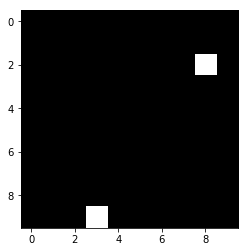

Action Right, Points: -5


In [ ]:
path = "./_models/improved-20180620T024619-054"

model = load_model(path)

accuracy = test(model, grid_size, gui=True)

print("Accuracy: {}".format(accuracy))

## Evaluating progress

That demo is pretty impressive huh? Before we end this little excursion, let's have a closer look at how our model actually did at learning. Earlier, we saved the history of victories. Now we can plot the moving average of the difference, that is, how many additional victories did the model score per extra game. 1 extra victory per game means the model wins every game (it catches every fruit), 0 means it looses all of them. As you can see the model approaches a 100% victory rate over time. After 4000 plays, the model wins relatively consistently. The random drops in performance are likely due to the random choice epsilon that are made from time to time. A better model would get closer to 100% faster.

In [ ]:
£